## Import libraries & loading the file

In [17]:
# Importing libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#loading the file
filename = 'Group_11_dataframe.xls'
df = pd.read_excel(filename)

## Looking at our data

In [19]:
df.head()

,video_title,view_count,category,duration_in_seconds,upload_time,captured_time,num_dislikes,num_likes,video_desp,ratio,new_view_count
0,Elmo and Cookie Monster have some Adult Fun,1313791,Comedy,42,2008-12-28T21:57:55.000Z,01/18/13,193,9671,Discovered completely by accident by putting t...,0.980434,1.313791
1,First Blog / Dorkiness Prevails,4484903,Film,95,2006-06-16T18:49:21.000Z,01/18/13,4390,5678,"So, I finally got a webcam and got it working ...",0.563965,4.484903
2,We Love You Maria Venus Raj 22 Philippines,3556190,Entertainment,253,2010-08-24T08:27:12.000Z,01/18/13,855,16005,"We are only among many who went wild. Irina, M...",0.949288,3.556190
3,shiba inu white pupy 【超可愛い】【初公開】白柴くもくんの鳴き声,5914475,Animals,49,2009-09-19T05:53:24.000Z,01/18/13,395,38612,生まれて9日目のくもくんです。 Thank you for watching this mo...,0.989874,5.914475
4,Mariko Takahashi's Fitness Video,590989,Howto,210,2006-03-16T05:43:31.000Z,01/18/13,186,1477,This is a mesmerizing and frightening video. I...,0.888154,0.590989


In [20]:
df.tail()

,video_title,view_count,category,duration_in_seconds,upload_time,captured_time,num_dislikes,num_likes,video_desp,ratio,new_view_count
441,Zidane headbutt,5985159,Sports,53,2006-07-10T10:58:41.000Z,01/18/13,295,5357,Zidane headbutts Materazzi in extra time of th...,0.947806,5.985159
442,Catch the Ice Dude,23840494,Comedy,79,2012-09-28T14:59:53.000Z,01/18/13,2533,105295,http://soundcloud.com/bipole/sets/bipole ht...,0.976509,23.840494
443,"Evaporating Water in -30C in Yellowknife, NWT",8659010,Tech,33,2010-01-02T00:35:00.000Z,01/18/13,124,10833,http://www.spectacularnwt.com On a winter day ...,0.988683,8.659010
444,Eating a Ghost Chili Pepper (Naga/Bhut Jolokia...,2841485,Entertainment,349,2011-10-11T05:18:35.000Z,01/18/13,1337,14778,This guy has never eaten a spicy thing in his ...,0.917034,2.841485
445,Girl Wrecks Hard On Bike Jump,1743823,Comedy,46,2011-07-09T21:47:31.000Z,01/18/13,60,4047,Rounded up the crew and headed off to the Alpi...,0.985391,1.743823


In [22]:
#checking we have no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_title          446 non-null    object 
 1   view_count           446 non-null    int64  
 2   category             446 non-null    object 
 3   duration_in_seconds  446 non-null    int64  
 4   upload_time          446 non-null    object 
 5   captured_time        446 non-null    object 
 6   num_dislikes         446 non-null    int64  
 7   num_likes            446 non-null    int64  
 8   video_desp           445 non-null    object 
 9   ratio                446 non-null    float64
 10  new_view_count       446 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 38.5+ KB


- There were 2 missing rows for the Ratio column: This was because the likes and dislikes for these videos are equal to 0, and dividing by 0 results in an error (NaN value). The ratio for these two rows has been assigned to 0.
- The 'new_view_count' column is the 'view_count' column divided by 1 million. All the videos in the dataframe have at least 1 million views, so this new column enables us to look at the values in an easier way.
- The 'ratio' column is the percentage of likes a video gets. It was calculated using the following formula: (num_likes/(num_likes + num_dislikes) * 100)

## Plotting our data

In [23]:
views = df.loc[ : , 'new_view_count'].values
likes = df.loc[ : , 'num_likes'].values
dislikes = df.loc[ : , 'num_dislikes'].values 
ratio = df.loc[ : , 'ratio'].values

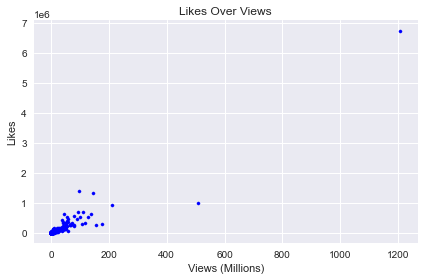

In [24]:
#lets plot views on the X axis and likes on the Y axis!

plt.scatter(views, likes, s=10, c='blue')
plt.xlabel('Views (Millions)')
plt.ylabel('Likes')
plt.title('Likes Over Views')
plt.tight_layout()
plt.style.use('seaborn')
plt.savefig('likesoverviews.png', dpi=300)

## Removing outliers

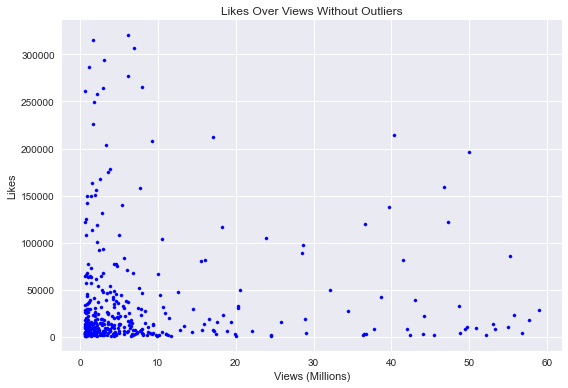

In [26]:
#removing outliers
x = df['new_view_count']
removed_outliers1 = x.between(x.quantile(.05), x.quantile(.95))
y = df['num_likes']
removed_outliers2 = y.between(y.quantile(.05), y.quantile(.95))
#doing a scatterplot
plt.scatter(x[removed_outliers1],y[removed_outliers2], s=10, c='blue')
plt.xlabel('Views (Millions)')
plt.ylabel('Likes')
plt.title('Likes Over Views Without Outliers')
plt.tight_layout()

## Boxplots
### Number of views by category


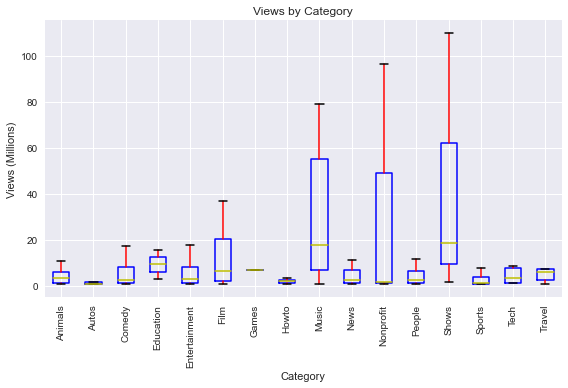

In [31]:
df.boxplot(column='new_view_count', by="category", color=dict(boxes='b', whiskers='r', medians='y', caps='k'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=False, grid=True, rot=90)
plt.suptitle("")
plt.xlabel('Category')
plt.ylabel('Views (Millions)')
plt.title('Views by Category')
plt.tight_layout()

## Histogram
### To look at how many videos from each category goes viral

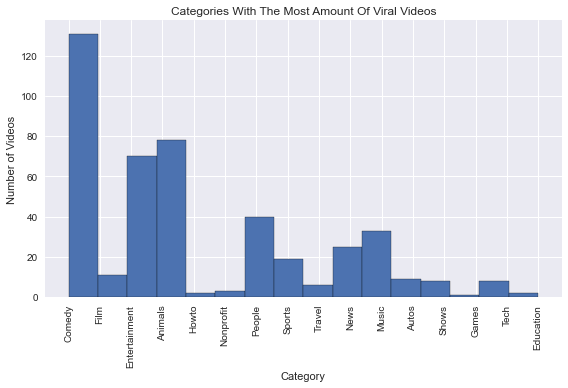

In [35]:
df['category'].hist(edgecolor='black', bins=16)
plt.xticks(rotation=90)
plt.suptitle("")
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.title('Categories With The Most Amount Of Viral Videos')
plt.tight_layout()